In [1]:
import Bio
import re
from Bio.Seq import Seq
from Bio import SeqIO           #importing some libiraries wich we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

obj={
    "Start":[],
    "End":[],
    "consensus": [],            #creating object1 that we need to put the data from function1 in it
    "omicron_seq": [],
    "index":[],
    "ratio":0

}
obj2={
    "consensus": [],
    "omicron_seq": [],       #creating object2 that we need to put the data from function2 in it
    "index":[],
    "dissimilarity":[]
}

result=obj      #result of the first function
result2=obj2    #result of the second function

In [3]:
deltaData = []   #all data from the the fasta file
omicronData = [] #all data from the the fasta file
deltaSeq = []   #first 10 sequences of the delta
omicronSeq = [] #first 10 sequences of the omicron
delta = open(r'Delta10Aligned.fas','r')      #put you data path here
omicron = open(r'omicon10Aligned.fas','r')   #put you data path here

for record in SeqIO.parse(delta, "fasta"):  # function separates the sequences in fasta file
    deltaData.append(record.seq)

for record in SeqIO.parse(omicron, "fasta"):  # function separates the sequences in fasta file
    omicronData.append(record.seq)

for i in range(10):  # to get the first 10 sequences in the fasta file
    deltaSeq.append(deltaData[i])
for i in range(10):
    omicronSeq.append(omicronData[i])

In [4]:
def colored(r, g, b, text):   #function to set color to text
    return "\033[38;2;{};{};{}m{}\033[38;2;255;255;255m".format(r, g, b, text)
redA=colored(255,0,0,'A')     #red for A
greenC=colored(0,255,0,'C')   #green for C
blueG=colored(0,0,255,'G')    #blue for G
purpleT=colored(255,0,255,'T') #purple for T
colorConsSeq=''  #the colored consensus sequence

In [5]:
def GetConsSeq(Seq):        #function to get the consensus sequence
    consSeq=''      #the consensus sequence
    for j in range(len(Seq[0])):
        indexs=[0,0,0,0]  #index=[Aindex,Cindex,Gindex,Tindex]
        for i in range(10):
            if Seq[i][j]=="A":      #if the nucleotide is A increas Aindex
                indexs[0]=indexs[0]+1
            elif Seq[i][j]=="C":     #if the nucleotide is C increas Cindex
                indexs[1]=indexs[1]+1
            elif Seq[i][j]=="G":      #if the nucleotide is G increas Gindex
                indexs[2]=indexs[2]+1
            elif Seq[i][j]=="T":      #if the nucleotide is T increas Tindex
                indexs[3]=indexs[3]+1
        maxindex=indexs.index(max(indexs))  #get the maximun index score
        if maxindex==0:                    #if A maximum add A
            consSeq=consSeq+'A'
        elif maxindex==1:                   #if C maximum add C
            consSeq=consSeq+'C'
        elif maxindex==2:                   #if G maximum add G
            consSeq=consSeq+'G' 
        elif maxindex==3:                   #if T maximum add T
            consSeq=consSeq+'T'
    return consSeq

In [6]:
colorConsSeq=GetConsSeq(deltaSeq)
                     #change every char in consSeq to colored one
colorConsSeq=colorConsSeq.replace('A',redA)    
colorConsSeq=colorConsSeq.replace('C',greenC)
colorConsSeq=colorConsSeq.replace('G',blueG)
colorConsSeq=colorConsSeq.replace('T',purpleT)

In [7]:
def GetDissimilar(ConsSeq,Seq):         #function to get the difference between the consensus sequence and each omicron sequence
    Dissimilar_Index =[[0 for x in range(0)] for y in range(30000)] #creating 2d array to put the difference indexes for each seq in it
    x=[[0 for x in range(0)] for y in range(30000)] #creating 2d array to put the the difference in Consensus data
    y=[[0 for x in range(0)] for y in range(30000)] #creating 2d array to put the the difference for each omicron seq in it
    for i in range(10):
        for j in range(len(ConsSeq)):
            if ConsSeq[j]!=Seq[i][j]:
                Dissimilar_Index[i].append(j)               #itirate for each element to see if there are a difference or not
                x[i].append(ConsSeq[j])
                y[i].append(Seq[i][j])

        result2["index"].append(i+1)
        result2["consensus"].append(x[i])
        result2["omicron_seq"].append(y[i])                 #put the data in the object to get the final data
        result2["dissimilarity"].append(Dissimilar_Index)

    print("the difference between the consensus sequence and omicron sequences:")
    print(pd.DataFrame(result2))
    pd.DataFrame(result2).to_csv("dissimilarityForEacheq2.csv", encoding='utf-8', index=False)   #if you want to print the data in csv file

In [8]:
def ExtractDRegion(ConsSeq,Seq):                        #function to extract the dissimilar region between tha consensus seq and omicron
    start = []                                          #the start and the end for the regions
    end = []
    IndexDissim =[]                                     #the dissimilar indexes
    FinalDissimRegion =[]                               #dissimilar indexes in regions
    SumStart=0
    SumEnd=0                                            #variables that we need to calculate the dissimilar ratio
    SumIndex=0

    for bases in range(len(Seq[0])):
        check=0
        for IndexOfSeq in range(9):
            if Seq[IndexOfSeq][bases]!=Seq[IndexOfSeq+1][bases]:        #to get the all dissimilar indexes
                check=1
        if check == 1:
            IndexDissim.append(bases)

    for i in range(len(IndexDissim)-1):
        if IndexDissim[i]!=IndexDissim[i+1]-1:                          #to get the dissimilar region
            FinalDissimRegion.append(IndexDissim[i])

    for i in range(len(FinalDissimRegion)+1):       #looping in the regions that we get above and get the dissimilar indexes and the difference
        Dissimilar = []
        DissimilarConsensus = []                    #creating some variables that we put the data in it
        DissimilarOmicron = []


        if i ==0:
            start.append(0)
            end.append(FinalDissimRegion[i]-1)      #for the first region to begin from 0 to the start point of the second region
        elif i < len(FinalDissimRegion)-1 :

            start.append(FinalDissimRegion[i]+1)
            end.append(FinalDissimRegion[i+1]-1)    #for the middle regions
        else:
            start.append(FinalDissimRegion[len(FinalDissimRegion)-1])
            end.append(len(ConsSeq)-1)              #for the final region to end with the final index of the data

        s=start[i]
        while s <= end[i]:
            if ConsSeq[s] != Seq[0][s]:
                Dissimilar.append(s)                #looping to get the data for the from tha start point and the end point for each region
                DissimilarConsensus.append(ConsSeq[s])
                DissimilarOmicron.append(Seq[0][s])

            s=s+1
        if len(Dissimilar) !=0:
            result["Start"].append(start[i])        #now we put the final data in the object to print it
            result["End"].append(end[i])
            result["index"].append(Dissimilar)
            result["consensus"].append(DissimilarConsensus)
            result["omicron_seq"].append(DissimilarOmicron)

    for i in range(len(result["Start"])):           #getting the dissimilar ration
        SumStart=SumStart+result["Start"][i]
        SumEnd=SumEnd+result["End"][i]
        SumIndex=SumIndex+len(result["index"][i])
    ratio=((SumIndex)*100)/(SumEnd - SumStart)

    print("Dissimilar region:")
    print(pd.DataFrame(result))
    print(ratio)

    pd.DataFrame(result).to_csv("dissimilarityForEacheq2.csv", encoding='utf-8', index=False)  #if you want to print the data in csv file

In [9]:
print("the consensus seq is:",colorConsSeq) # the first function to get the consensus seq

ExtractDRegion(GetConsSeq(deltaSeq) , omicronSeq)   #function to extract the dissimilar region between tha consensus seq and omicron

GetDissimilar(GetConsSeq(deltaSeq) , omicronSeq)    #function to get the difference between the consensus sequence and each omicron sequence

the consensus seq is: AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGA

Dissimilar region:
    Start    End                                          consensus  \
0       0    564                                                [T]   
1    2284   5249                                             [A, T]   
2    5251   5674                                                [T]   
3    5676   8677                                 [T, G, T, T, T, G]   
4    8679  11019                                       [T, T, C, T]   
5   11021  12454               [G, T, T, G, T, C, T, G, G, T, G, A]   
6   12456  16233                                          [T, C, A]   
7   16235  21081                                          [T, A, T]   
8   21083  21931                        [G, C, T, A, C, A, T, G, C]   
9   21933  22099               [T, G, T, T, T, A, T, T, A, A, A, A]   
10  22101  23617  [A, T, T, G, T, C, T, C, G, T, G, G, G, A, A, ...   
11  23619  25799                     [C, G, C, A, A, T, C, C, T, C]   
12  25835  27328                                 [C, A, C,

Delta of hCoV-19 Consensus Sequence has : 
C ratio 0.1832806084673891
G ratio 0.19617015548226424
T ratio 0.32163290031634917
A ratio 0.29891633573399745
CG ratio 0.3794507639496534


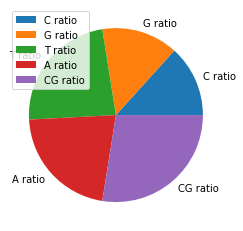

In [10]:

consSeq = GetConsSeq(deltaSeq)

print ("Delta of hCoV-19 Consensus Sequence has : ")

C_num = re.findall(r"C",consSeq)       #Appending all the C nucleotides of the consSeq to an array
C_ratio_delta =len(C_num)/len(consSeq) #percentage from the whole dna 
print ("C ratio",C_ratio_delta)


G_num = re.findall(r"G",consSeq)
G_ratio_delta =len(G_num)/len(consSeq)  #Appending all the G nucleotides of the consSeq to an array
print ("G ratio",G_ratio_delta)     #Cpercentage from the whole dna

T_num = re.findall(r"T",consSeq)        #Appending all the T nucleotides of the consSeq to an array
T_ratio_delta =len(T_num)/len(consSeq)  #percentage from the whole dna
print ("T ratio",T_ratio_delta)


A_num = re.findall(r"A",consSeq)       #Appending all the A nucleotides of th consSeq to an array
A_ratio_delta =len(A_num)/len(consSeq) #percentage from the whole dna 
print ("A ratio",A_ratio_delta)



CG_ratio_delta =(len(G_num)+len(C_num))/len(consSeq)  #percentage of both C and G from the whole dna 
print ("CG ratio",CG_ratio_delta)

# a pie chart of the data 

y = np.array([C_ratio_delta, G_ratio_delta,T_ratio_delta,A_ratio_delta,CG_ratio_delta])
mylabels = ["C ratio", "G ratio", "T ratio", "A ratio","CG ratio"]
plt.pie(y,normalize=True,labels = mylabels)
plt.legend()
plt.show() 

In [11]:
# initialize empty arrays to append the ratios of constituents in all the 10 dna strands 
C_tot_omicron = []
G_tot_omicron = []
T_tot_omicron = []
A_tot_omicron = []
CG_tot_omicron = []
i = 1
for record in SeqIO.parse("10omicronFas.fas", "fasta"): # iterate over the 10 dna starnds
    dna = str(record.seq) # convert to string for searching 
    print (record.description[0:35],"has : ") # print each nucleotide ID before printing it's ratios 
    
    C_num = re.findall(r"C",dna) #Nucleotide Searching 
    print ("C ratio",len(C_num)/len(dna)) 
    C_tot_omicron.append(len(C_num)/len(dna)) #Calculate ratios and append to the array 
    
    G_num = re.findall(r"G",dna)  #Nucleotide Searching
    print ("G ratio",len(G_num)/len(dna))
    G_tot_omicron.append(len(G_num)/len(dna)) #Calculate ratios and append to the array 
    
    T_num = re.findall(r"T",dna) #Nucleotide Searching
    print ("T ratio",len(T_num)/len(dna))
    T_tot_omicron.append(len(T_num)/len(dna)) #Calculate ratios and append to the array 
    
    A_num = re.findall(r"A",dna) #Nucleotide Searching
    print ("A ratio",len(A_num)/len(dna))
    A_tot_omicron.append(len(A_num)/len(dna)) #Calculate ratios and append to the array 
    
    
    print ("CG ratio",(len(G_num)+len(C_num))/len(dna))
    CG_tot_omicron.append((len(G_num)+len(C_num))/len(dna)) #Calculate ratios of C and G together and append to the array 
    
    print(" ")

omicron hCoV-19/Botswana/R59B33 BHP has : 
C ratio 0.18072289156626506
G ratio 0.19364609275089184
T ratio 0.31658477485360437
A ratio 0.2948778353638016
CG ratio 0.37436898431715687
 
omicron hCoV-19/Botswana/R59B34 BHP has : 
C ratio 0.18072289156626506
G ratio 0.19367974692064346
T ratio 0.3165174665141011
A ratio 0.2948441811940499
CG ratio 0.3744026384869085
 
omicron hCoV-19/Botswana/R59B36 BHP has : 
C ratio 0.18075654573601668
G ratio 0.19364609275089184
T ratio 0.3165511206838527
A ratio 0.2948778353638016
CG ratio 0.3744026384869085
 
omicron hCoV-19/Botswana/R59B37 BHP has : 
C ratio 0.18075654573601668
G ratio 0.19367974692064346
T ratio 0.3166520831931076
A ratio 0.2948441811940499
CG ratio 0.3744362926566602
 
omicron hCoV-19/Botswana/R59B38 BHP has : 
C ratio 0.1788719122299253
G ratio 0.19219896345157164
T ratio 0.31520495389378744
A ratio 0.29279127683920037
CG ratio 0.37107087568149694
 
omicron hCoV-19/Botswana/R59B39 BHP has : 
C ratio 0.18068923739651344
G ratio 0.

Omicron of hCoV-19 in Botswana has :
Average C ratio of  0.17939355186107558
Average G ratio of  0.19249175472841085
Average T ratio of  0.3154674564178502
Average A ratio of  0.2932792623005991
Average CG ratio of  0.3718853065894864


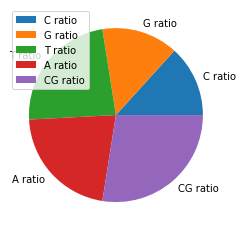

In [12]:
#ratios average 

print ("Omicron of hCoV-19 in Botswana has :")
print("Average C ratio of " ,np.average(C_tot_omicron))  
print("Average G ratio of " ,np.average(G_tot_omicron))  
print("Average T ratio of " ,np.average(T_tot_omicron))  
print("Average A ratio of " ,np.average(A_tot_omicron))  
print("Average CG ratio of " ,np.average(CG_tot_omicron))  

#Pie Chart Generation

y = np.array([np.average(C_tot_omicron), np.average(G_tot_omicron),np.average(T_tot_omicron),np.average(A_tot_omicron),np.average(CG_tot_omicron)])
mylabels = ["C ratio", "G ratio", "T ratio", "A ratio","CG ratio"]
plt.pie(y,normalize=True,labels = mylabels)
plt.legend()
plt.show() 

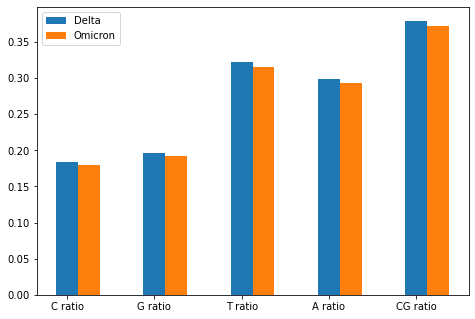

In [13]:
#bar chart comparison

data1 = [C_ratio_delta, G_ratio_delta,T_ratio_delta,A_ratio_delta,CG_ratio_delta]
data2 = [np.average(C_tot_omicron), np.average(G_tot_omicron),np.average(T_tot_omicron),np.average(A_tot_omicron),np.average(CG_tot_omicron)]

X = np.arange(len(data1))
labels = ["C ratio", "G ratio", "T ratio", "A ratio","CG ratio"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, data1, width = 0.25)
ax.bar(X + 0.25,data2, width = 0.25)

ax.legend(labels=['Delta', 'Omicron'])